In [38]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tb = pd.read_csv('/Users/iswetha/ironhack/dataV2-labs/module-2/Week_6_Module_2_Project/data/TB_burden_age_sex_2020-11-16_clean.csv')
tb.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [3]:
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB2.db')
c = conn.cursor()

# c.execute('CREATE TABLE tb_data (country text, iso2 text, iso3 text, iso_numeric number, year number, measure text, unit text, age_group text, sex text, risk_factor text, best number, lo number, hi number)')
# conn.commit()

tb.to_sql('tb_data', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM tb_data
          ''')

df = DataFrame(c.fetchall(), columns=['country','iso2', 'iso3', 'iso_numeric', 'year', 'measure', 'unit', 'age_group', 'sex', 'risk_factor', 'best', 'lo', 'hi'])    
df.head()

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
0,Afghanistan,AF,AFG,4,2019,inc,num,0-14,a,all,15000,7900.0,22000.0
1,Afghanistan,AF,AFG,4,2019,inc,num,0-14,f,all,7300,2400.0,12000.0
2,Afghanistan,AF,AFG,4,2019,inc,num,0-14,m,all,7800,2600.0,13000.0
3,Afghanistan,AF,AFG,4,2019,inc,num,0-4,f,all,2900,0.0,7200.0
4,Afghanistan,AF,AFG,4,2019,inc,num,0-4,m,all,3400,0.0,8500.0


In [31]:
risk_factor_2020 = df.loc[(df['risk_factor'] == 'alc') | (df['risk_factor'] == 'dia') | (df['risk_factor'] == 'hiv') | (df['risk_factor'] == 'smk') | (df['risk_factor'] == 'und')]
risk_factor_2020

,country,iso2,iso3,iso_numeric,year,measure,unit,age_group,sex,risk_factor,best,lo,hi
8,Afghanistan,AF,AFG,4,2019,inc,num,15plus,a,alc,520,58.0,1500.0
9,Afghanistan,AF,AFG,4,2019,inc,num,15plus,f,alc,73,4.0,240.0
12,Afghanistan,AF,AFG,4,2019,inc,num,15plus,m,alc,350,21.0,1100.0
13,Afghanistan,AF,AFG,4,2019,inc,num,18plus,a,dia,3200,450.0,8500.0
14,Afghanistan,AF,AFG,4,2019,inc,num,18plus,f,dia,1800,92.0,5900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,Zimbabwe,ZW,ZWE,716,2019,inc,num,18plus,a,dia,900,140.0,2300.0
7196,Zimbabwe,ZW,ZWE,716,2019,inc,num,18plus,f,dia,380,33.0,1100.0
7197,Zimbabwe,ZW,ZWE,716,2019,inc,num,18plus,m,dia,500,29.0,1600.0
7211,Zimbabwe,ZW,ZWE,716,2019,inc,num,all,a,hiv,16000,11000.0,22000.0


In [32]:
risk_factor_2020 = risk_factor_2020.pivot_table(index=['risk_factor'], columns = ['sex'],aggfunc={'best':'mean'})
risk_factor_2020

best                         
sex                     a           f            m
risk_factor                                       
alc           3867.551351  340.737143  4056.091892
dia           1880.564516  696.333333  1202.784946
hiv           4651.319018         NaN          NaN
smk           4748.585034  305.496552  5044.557823
und          13616.926380         NaN          NaN

In [33]:
risk = risk_factor_2020['best']
risk 

sex,a,f,m
risk_factor,,,
alc,3867.551351,340.737143,4056.091892
dia,1880.564516,696.333333,1202.784946
hiv,4651.319018,NaN,NaN
smk,4748.585034,305.496552,5044.557823
und,13616.926380,NaN,NaN


In [34]:
risk_for_gender = pd.DataFrame()
risk_for_gender['Men'] = risk['m']
risk_for_gender['Women'] = risk['f']
risk_for_gender

,Men,Women
risk_factor,,
alc,4056.091892,340.737143
dia,1202.784946,696.333333
hiv,NaN,NaN
smk,5044.557823,305.496552
und,NaN,NaN


Text(0, 0.5, 'Number of Incidences')

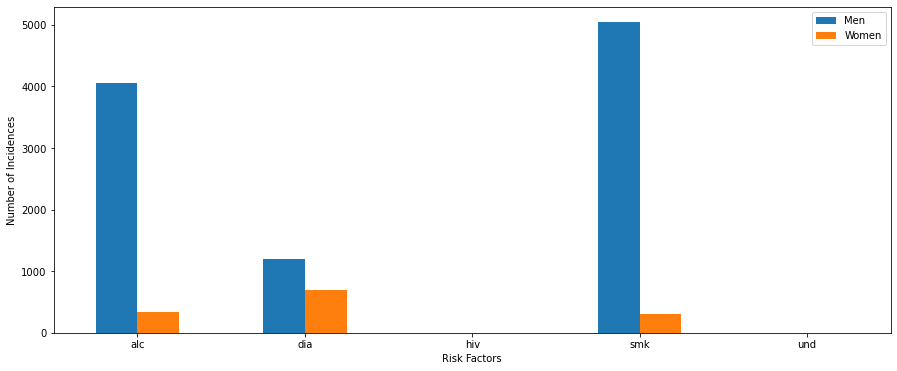

In [37]:
ax = risk_for_gender.plot.bar(rot=0, figsize=(15, 6))
plt.xlabel('Risk Factors')
plt.ylabel('Number of Incidences')